<a href="https://colab.research.google.com/github/karthicsalem/fods-sem-5/blob/master/CSE18231_Visualisation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import  scipy as sc
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1

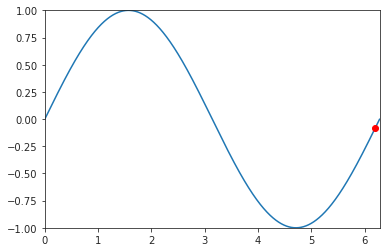

In [5]:
end= 2*np.pi
fig, ax = plt.subplots()
t = np.arange(0.0, end, 0.001)
s = np.sin(t)
l = plt.plot(t, s)
ax = plt.axis([0,end,-1,1])
redDot, = plt.plot([0], [np.sin(0)], 'ro')
def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,
ani=FuncAnimation(fig, animate, frames=np.arange(0.0, end, 0.1),interval=10, blit=True, repeat=True)

ani

# 2

# Plotting Coimbatore and Chennai

In [6]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

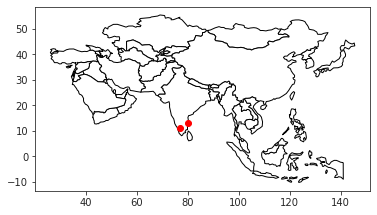

In [7]:
df = pd.DataFrame(
    {'City': ['Coimbatore', 'Chennai'],
     'Country': ['India', 'India'],
     'Latitude': [11.00, 13.04],
    'Longitude': [77.00, 80.17]})
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'Asia'].plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red');

In [8]:
df=pd.read_csv('https://github.com/karthicsalem/fods-sem-5/raw/master/day.csv')

In [9]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# 3

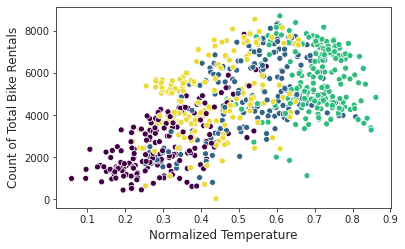

In [10]:
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=(6,3.7))
sns.scatterplot('temp','cnt',data=df,hue='season',palette=['#420044','#336485','#2ebb7d','#ebd935'],legend=None)
plt.xlabel('Normalized Temperature', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large');

# 4

In [11]:
def func(a):
  s={1:'Spring',2:'Summer',3:'Fall/Autumn',4:'Winter'}
  return s[a]
df1=df.copy()
df1.rename(columns={'season':'Season'},inplace=True)
df1['Season']=df1['Season'].apply(func)

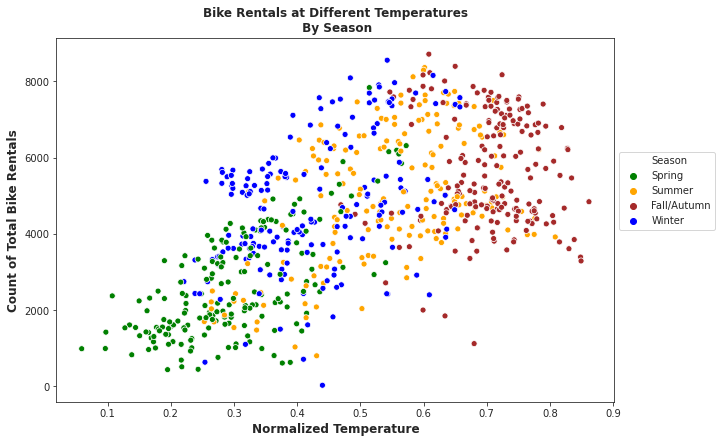

In [12]:
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=(10,6.7))
f=dict(weight='bold')
sns.scatterplot('temp','cnt',data=df1,hue='Season',palette=['Green','Orange','Brown','Blue'])
plt.xlabel('Normalized Temperature', fontsize='large',fontdict=f)
plt.ylabel('Count of Total Bike Rentals', fontsize='large',fontdict=f)
plt.title('Bike Rentals at Different Temperatures\n By Season',fontdict=f)
plt.legend(bbox_to_anchor=(1,0.7));

# 5

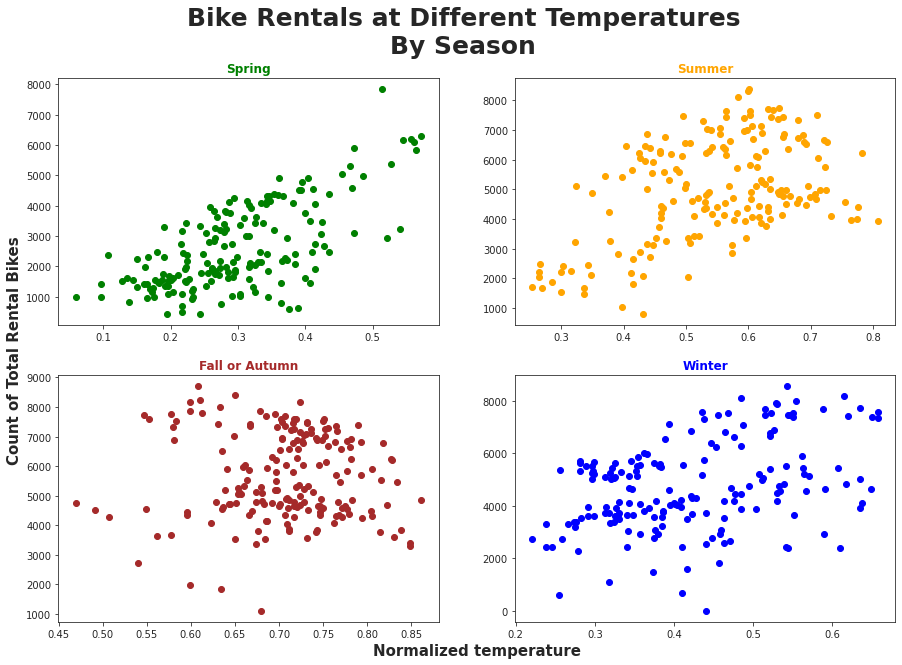

In [13]:
fig1,ax1=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")

ax1[0,0].scatter('temp','cnt',data=df1[df1['Season']=='Spring'],c='green')

ax1[0,0].set_title('Spring', color="green",fontweight="bold")
ax1[0,0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,-0.1))


ax1[0,1].scatter('temp', 'cnt', data=df1[df1['Season']=='Summer'], c="orange")
ax1[0,1].set_title('Summer', color="orange",fontweight="bold")


ax1[1,0].scatter('temp', 'cnt', data=df1[df1['Season']=='Fall/Autumn'], c="brown")
ax1[1,0].set_title('Fall or Autumn', color="brown",fontweight="bold")


ax1[1,1].scatter('temp', 'cnt', data=df1[df1['Season']=='Winter'], c="blue")
ax1[1,1].set_title("Winter", color="blue",fontweight="bold")
ax1[1,1].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold", position=(-0.1,0));

# 6

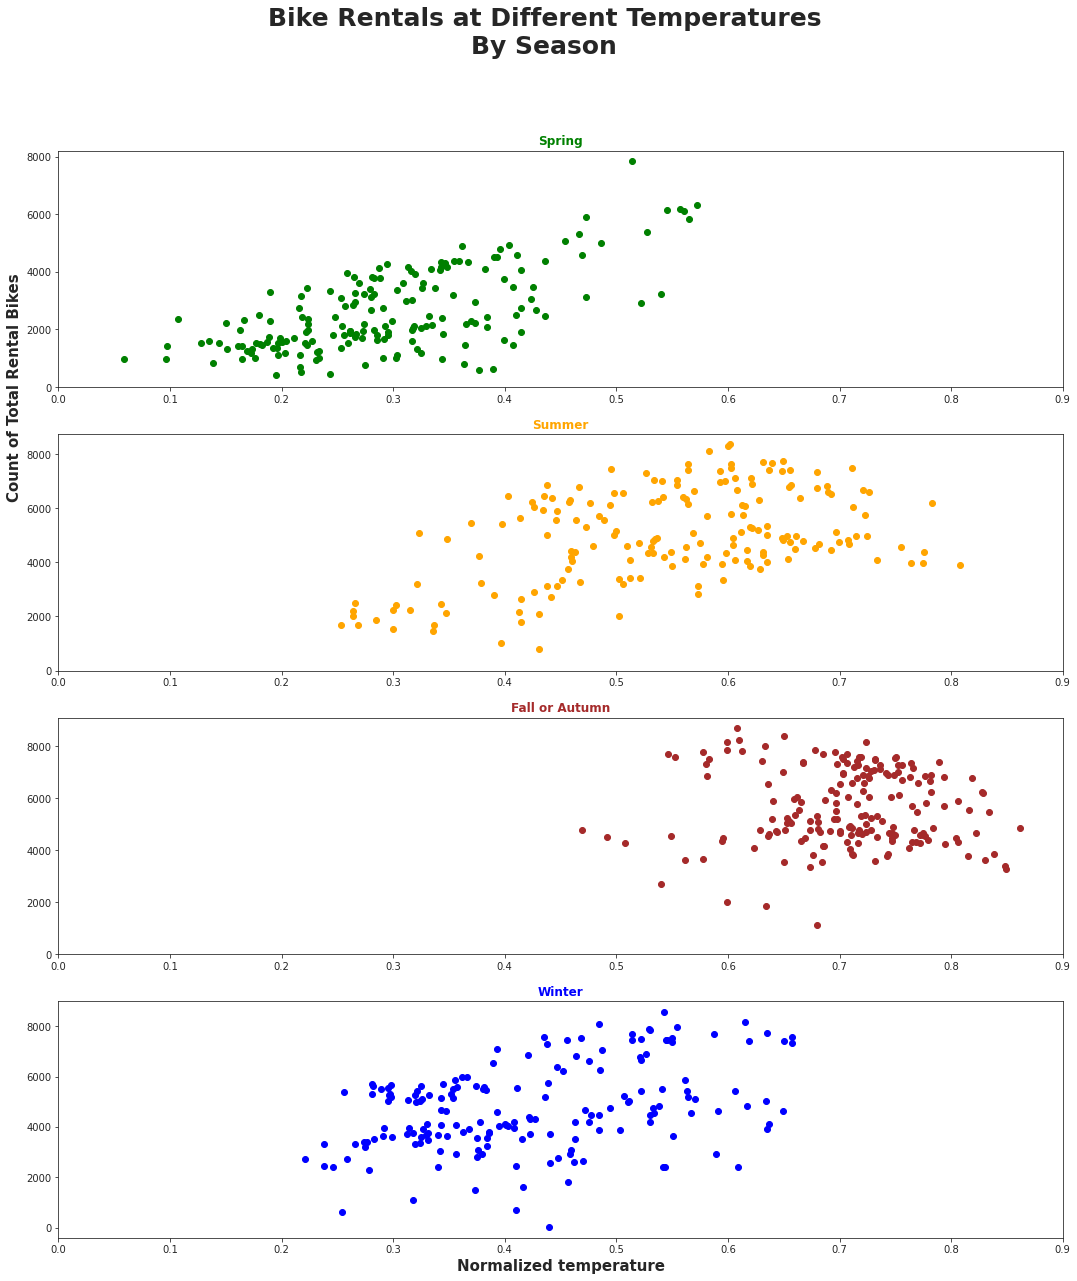

In [14]:
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y=[0,2000,4000,6000,8000]
fig1,ax1=plt.subplots(nrows=4,ncols=1,figsize=(18,20))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")
ax1[0].scatter('temp','cnt',data=df1[df1['Season']=='Spring'],c='green')

ax1[0].set_title('Spring', color="green",fontweight="bold")
ax1[0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,0))
ax1[0].set_xticks(x)
ax1[0].set_yticks(y)

ax1[1].scatter('temp', 'cnt', data=df1[df1['Season']=='Summer'], c="orange")
ax1[1].set_title('Summer', color="orange",fontweight="bold")
ax1[1].set_xticks(x)
ax1[1].set_yticks(y)

ax1[2].scatter('temp', 'cnt', data=df1[df1['Season']=='Fall/Autumn'], c="brown")
ax1[2].set_title('Fall or Autumn', color="brown",fontweight="bold")
ax1[2].set_xticks(x)
ax1[2].set_yticks(y)

ax1[3].scatter('temp', 'cnt', data=df1[df1['Season']=='Winter'], c="blue")
ax1[3].set_title("Winter", color="blue",fontweight="bold")
ax1[3].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold", position=(0.5,0))
ax1[3].set_xticks(x)
ax1[3].set_yticks(y);

# 7

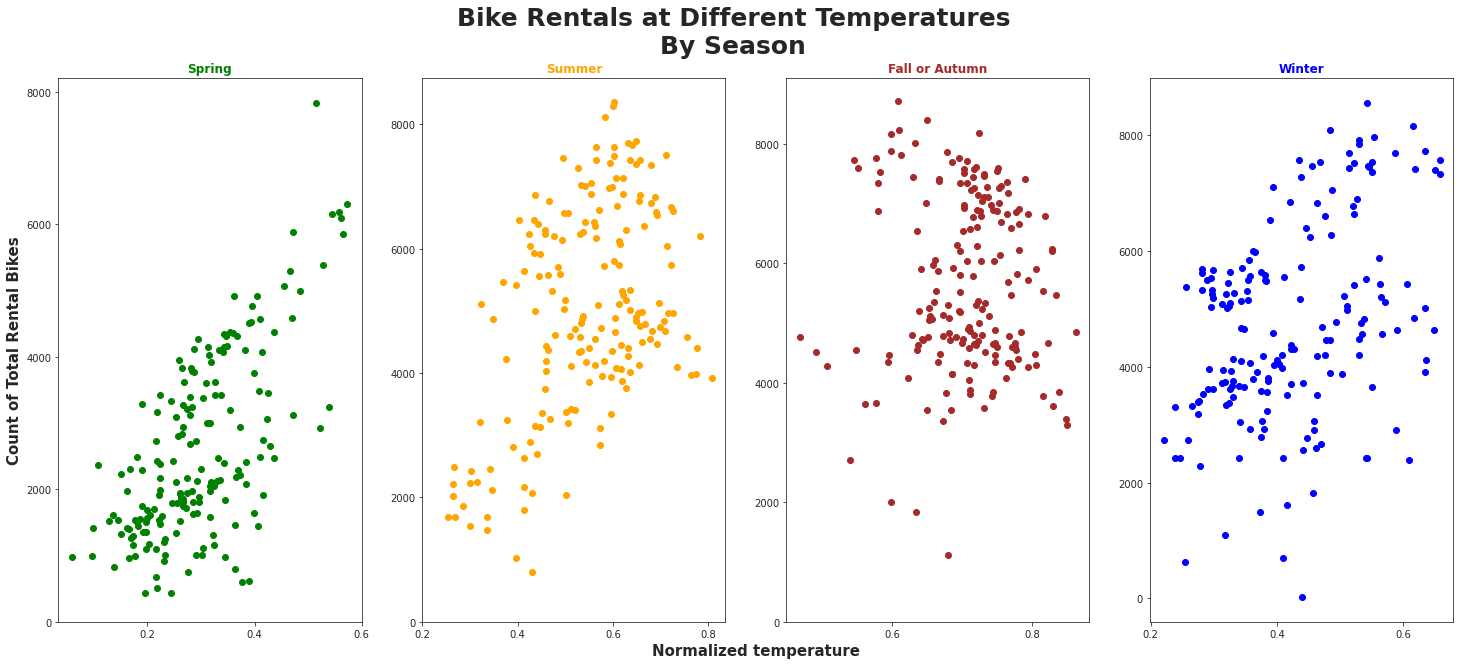

In [15]:
y=[0,2000,4000,6000,8000]
x1=[0.2,0.4,0.6]
x2=[0.2,0.4,0.6,0.8]
x3=[0.6,0.8]
fig1,ax1=plt.subplots(nrows=1,ncols=4,figsize=(25,10))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")
ax1[0].scatter('temp','cnt',data=df1[df1['Season']=='Spring'],c='green')

ax1[0].set_title('Spring', color="green",fontweight="bold")
ax1[0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,0.5))
ax1[0].set_xticks(x1)
ax1[0].set_yticks(y)

ax1[1].scatter('temp', 'cnt', data=df1[df1['Season']=='Summer'], c="orange")
ax1[1].set_title('Summer', color="orange",fontweight="bold")
ax1[1].set_xticks(x2)
ax1[1].set_yticks(y)

ax1[2].scatter('temp', 'cnt', data=df1[df1['Season']=='Fall/Autumn'], c="brown")
ax1[2].set_title('Fall or Autumn', color="brown",fontweight="bold")
ax1[2].set_xticks(x3)
ax1[2].set_yticks(y)

ax1[3].scatter('temp', 'cnt', data=df1[df1['Season']=='Winter'], c="blue")
ax1[3].set_title("Winter", color="blue",fontweight="bold")
ax1[3].set_xticks(x1)
ax1[2].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold",position=(-0.1,0))
ax1[3].set_yticks(y);

#8

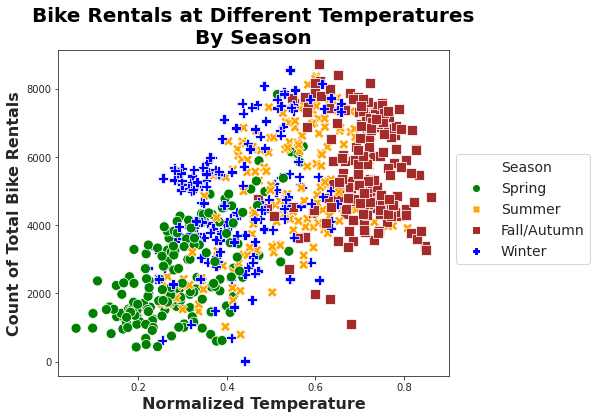

In [16]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='temp', y='cnt', hue='Season', data=df1,palette=['green','orange','brown','blue'],style='Season',s=100)
plt.xlabel('Normalized Temperature', fontsize=16, fontweight='bold')
plt.ylabel('Count of Total Bike Rentals', fontsize=16, fontweight='bold')
plt.title('Bike Rentals at Different Temperatures\nBy Season',color="black",fontweight='bold',fontsize=20,position=(0.5,1));
plt.legend(bbox_to_anchor=(1, 0.7),fontsize=14)
plt.xticks([0.2,0.4,0.6,0.8]);

# 9

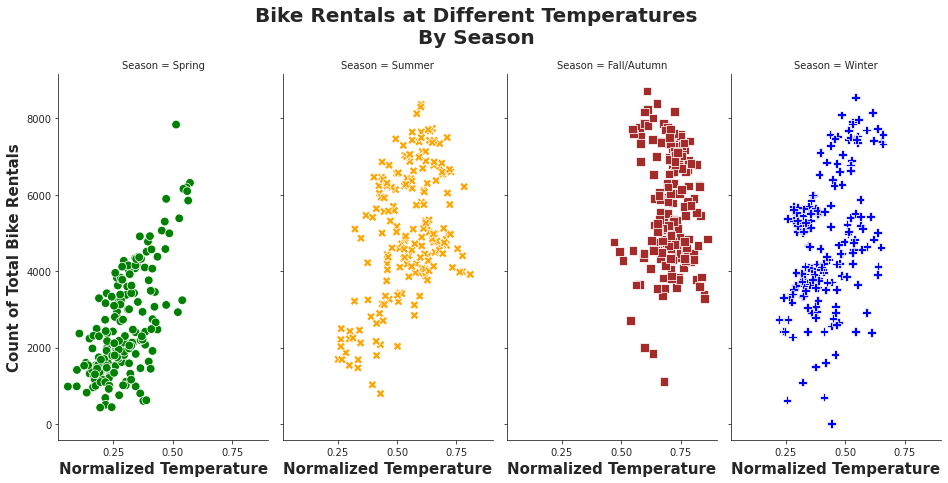

In [17]:
x=[0.25,0.50,0.75]
ac=sns.relplot(x='temp', y='cnt', hue='Season', data=df1,palette=['green','orange','brown','blue'],col='Season', col_wrap=4, legend=False,height=6,aspect=.55,style='Season', sizes=(800,1000),s=75)
ac.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.1), fontweight='bold', size=20)
ac.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
ac.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=15)
ac.set(xticks=x);

# 10

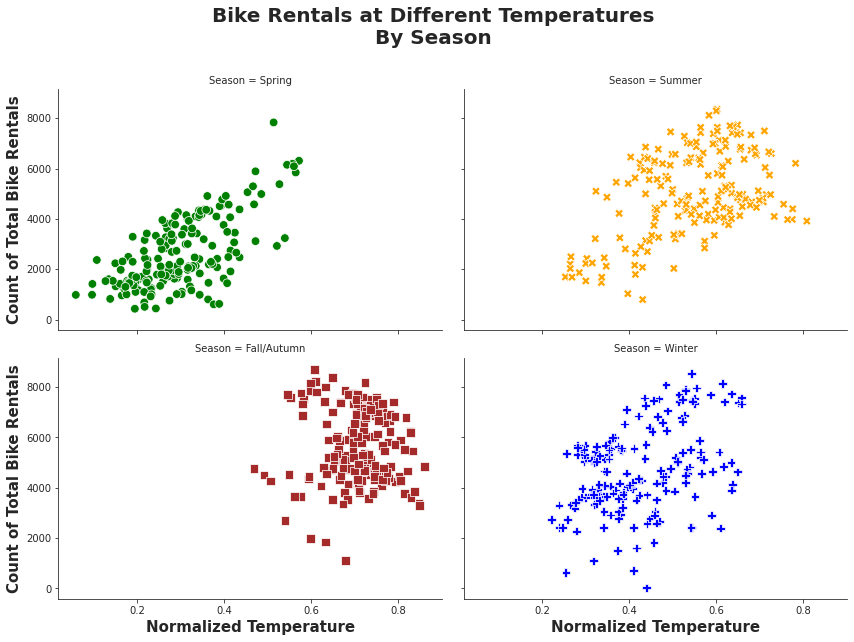

In [18]:
x=[0.2,0.4,0.6,0.8]
ab=sns.relplot(x='temp', y='cnt', hue='Season', data=df1,palette=['green','orange','brown','blue'],col='Season', col_wrap=2, legend=False,height=4,aspect=1.5,style='Season', sizes=(800,1000),s=75)
ab.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.1), fontweight='bold', size=20)
ab.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
ab.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=15)
ab.set(xticks=x);